In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading all data

In [3]:
df = pd.read_csv("../Resources/emissions_since1961_total_data.csv")

In [4]:
df.head()

,country,country_code,year,total,coal,oil,gas,cement,flaring,other,population,per_capita,temp_change
0,Australia,AUS,1961,90.503896,59.974780,29.115323,0.000000,1.413794,0.0,NaN,10483000,8.614547,0.151
1,Australia,AUS,1962,94.823455,61.485584,31.884128,0.003664,1.450079,0.0,NaN,10742000,8.852126,0.118
2,Australia,AUS,1963,100.934264,63.727952,35.658048,0.007328,1.540936,0.0,NaN,10950000,9.245287,-0.111
3,Australia,AUS,1964,108.875767,67.133213,39.943584,0.007328,1.791642,0.0,NaN,11167000,9.780775,-0.029
4,Australia,AUS,1965,120.852669,71.059616,47.906800,0.007328,1.878925,0.0,NaN,11388000,10.638962,0.121


In [5]:
df['country'].unique()

array(['Australia', 'Austria', 'Belarus', 'Belgium', 'Brazil', 'Bulgaria',
       'Canada', 'China', 'Croatia', 'Cyprus', 'Czech Republic',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Kazakhstan',
       'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'South Korea', 'Romania', 'Russia', 'Slovakia', 'Slovenia',
       'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine',
       'United Kingdom', 'USA', 'Global'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2806 entries, 0 to 2805
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       2806 non-null   object 
 1   country_code  2806 non-null   object 
 2   year          2806 non-null   int64  
 3   total         2806 non-null   float64
 4   coal          2777 non-null   float64
 5   oil           2777 non-null   float64
 6   gas           2777 non-null   float64
 7   cement        2776 non-null   float64
 8   flaring       2777 non-null   float64
 9   other         1530 non-null   float64
 10  population    2806 non-null   int64  
 11  per_capita    2806 non-null   float64
 12  temp_change   2385 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 285.1+ KB


### Notes

- MISSING DATA
    - country, country_code, year, total (emissions), population, and per_capita are not missing any values. 
    - coal, oil, gas, cement, flaring are missing like 30
    - temp_change is missing 421
    - other is missing almost half it's values. 
- Any data row where temp_change is null needs to be removed, we can't fill these
- While it might be fine to fill in 0 for other emissions, if too many of the emissions data is missing we might need to drop those rows. 

- ENCODING
    - county (or country_code) is going to need to be encoded in some way - either one hot or label based on something

In [7]:
df[df['temp_change'].isnull()]

,country,country_code,year,total,coal,oil,gas,cement,flaring,other,population,per_capita,temp_change
122,Belarus,BLR,1961,41.498004,7.863711,30.619432,2.434120,0.580740,0.000000,NaN,8271216,4.884563,NaN
123,Belarus,BLR,1962,43.584426,7.449568,32.597018,2.882427,0.655413,0.000000,NaN,8351928,5.068040,NaN
124,Belarus,BLR,1963,46.757941,7.587424,35.008453,3.463519,0.698545,0.000000,NaN,8437232,5.377575,NaN
125,Belarus,BLR,1964,49.737801,7.732225,37.097759,4.163414,0.744403,0.000000,NaN,8524224,5.665063,NaN
126,Belarus,BLR,1965,52.769004,7.932787,39.227049,4.778188,0.830980,0.000000,NaN,8610000,5.959550,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2588,Ukraine,UKR,1987,733.865729,364.423087,187.629070,168.817282,9.688782,3.307507,NaN,51293000,14.323123,NaN
2589,Ukraine,UKR,1988,727.308683,354.712812,174.383544,181.189537,9.748631,7.274160,NaN,51521000,14.157585,NaN
2590,Ukraine,UKR,1989,683.654316,322.270324,164.306646,180.258807,9.725281,7.093259,NaN,51773000,13.276248,NaN
2591,Ukraine,UKR,1990,705.830043,263.167837,205.686945,215.794074,9.400942,3.482547,8.297699,51891400,13.681577,NaN


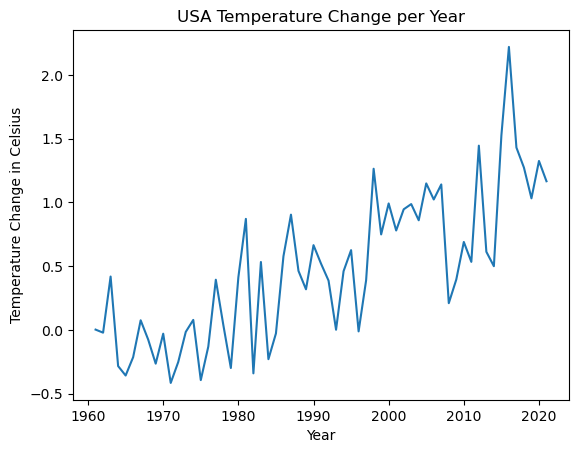

In [8]:
USA = df[df['country'] == 'USA']

plt.plot(USA['year'], USA['temp_change'])
plt.title("USA Temperature Change per Year")
plt.xlabel("Year")
plt.ylabel("Temperature Change in Celsius")
plt.show()

In [9]:
df[df['temp_change'].isnull()]["country"].unique()

array(['Belarus', 'Belgium', 'Croatia', 'Czech Republic', 'Estonia',
       'Kazakhstan', 'Latvia', 'Lithuania', 'Luxembourg', 'Russia',
       'Slovakia', 'Slovenia', 'Ukraine'], dtype=object)

In [10]:
df[df['coal'].isnull()]["country"].unique()

array(['Liechtenstein'], dtype=object)

In [11]:
df[df['oil'].isnull()]["country"].unique()

array(['Liechtenstein'], dtype=object)

In [12]:
df[df['gas'].isnull()]["country"].unique()

array(['Liechtenstein'], dtype=object)

In [13]:
df[df['cement'].isnull()]["country"].unique()

array(['Iceland', 'Liechtenstein'], dtype=object)

In [14]:
df[df['flaring'].isnull()]["country"].unique()

array(['Liechtenstein'], dtype=object)

In [15]:
df[df['other'].isnull()]["country"].unique()

array(['Australia', 'Austria', 'Belarus', 'Belgium', 'Brazil', 'Bulgaria',
       'Canada', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Japan', 'Kazakhstan', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
       'New Zealand', 'Norway', 'Poland', 'Portugal', 'South Korea',
       'Romania', 'Russia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Global'],
      dtype=object)

In [16]:
len(df[df['country'] == "USA"])

61

In [17]:
for country in df[df['temp_change'].isnull()]["country"].unique():
    print(country)
    print(61 - len(df[(df['country'] == country) & (df['temp_change'].isnull())]))
    print("--------------------")

Belarus
30
--------------------
Belgium
22
--------------------
Croatia
30
--------------------
Czech Republic
29
--------------------
Estonia
30
--------------------
Kazakhstan
30
--------------------
Latvia
30
--------------------
Lithuania
30
--------------------
Luxembourg
22
--------------------
Russia
30
--------------------
Slovakia
29
--------------------
Slovenia
30
--------------------
Ukraine
30
--------------------


In [18]:
df_temp_full = df[df['temp_change'].notnull()]

In [19]:
df_temp_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2385 entries, 0 to 2805
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       2385 non-null   object 
 1   country_code  2385 non-null   object 
 2   year          2385 non-null   int64  
 3   total         2385 non-null   float64
 4   coal          2356 non-null   float64
 5   oil           2356 non-null   float64
 6   gas           2356 non-null   float64
 7   cement        2355 non-null   float64
 8   flaring       2356 non-null   float64
 9   other         1486 non-null   float64
 10  population    2385 non-null   int64  
 11  per_capita    2385 non-null   float64
 12  temp_change   2385 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 260.9+ KB


In [20]:
df_full = df_temp_full[df_temp_full['cement'].notnull()]

In [21]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2355 entries, 0 to 2805
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       2355 non-null   object 
 1   country_code  2355 non-null   object 
 2   year          2355 non-null   int64  
 3   total         2355 non-null   float64
 4   coal          2355 non-null   float64
 5   oil           2355 non-null   float64
 6   gas           2355 non-null   float64
 7   cement        2355 non-null   float64
 8   flaring       2355 non-null   float64
 9   other         1485 non-null   float64
 10  population    2355 non-null   int64  
 11  per_capita    2355 non-null   float64
 12  temp_change   2355 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 257.6+ KB


In [22]:
df_filled = df_full.fillna(value=0)

In [23]:
df_filled.head()

,country,country_code,year,total,coal,oil,gas,cement,flaring,other,population,per_capita,temp_change
0,Australia,AUS,1961,90.503896,59.974780,29.115323,0.000000,1.413794,0.0,0.0,10483000,8.614547,0.151
1,Australia,AUS,1962,94.823455,61.485584,31.884128,0.003664,1.450079,0.0,0.0,10742000,8.852126,0.118
2,Australia,AUS,1963,100.934264,63.727952,35.658048,0.007328,1.540936,0.0,0.0,10950000,9.245287,-0.111
3,Australia,AUS,1964,108.875767,67.133213,39.943584,0.007328,1.791642,0.0,0.0,11167000,9.780775,-0.029
4,Australia,AUS,1965,120.852669,71.059616,47.906800,0.007328,1.878925,0.0,0.0,11388000,10.638962,0.121


In [24]:
country_encoding = {}
num = 1
for country in df_filled[df_filled['year'] == 2020].sort_values(by='total')['country']:
    country_encoding[country] = num
    num += 1

In [25]:
country_encoding

{'Liechtenstein': 1,
 'Malta': 2,
 'Iceland': 3,
 'Latvia': 4,
 'Cyprus': 5,
 'Luxembourg': 6,
 'Estonia': 7,
 'Slovenia': 8,
 'Lithuania': 9,
 'Croatia': 10,
 'Denmark': 11,
 'Slovakia': 12,
 'Switzerland': 13,
 'New Zealand': 14,
 'Ireland': 15,
 'Sweden': 16,
 'Bulgaria': 17,
 'Finland': 18,
 'Norway': 19,
 'Portugal': 20,
 'Hungary': 21,
 'Greece': 22,
 'Belarus': 23,
 'Austria': 24,
 'Romania': 25,
 'Belgium': 26,
 'Czech Republic': 27,
 'Netherlands': 28,
 'Ukraine': 29,
 'Spain': 30,
 'Kazakhstan': 31,
 'France': 32,
 'Italy': 33,
 'Poland': 34,
 'United Kingdom': 35,
 'Australia': 36,
 'Turkey': 37,
 'Brazil': 38,
 'Canada': 39,
 'South Korea': 40,
 'Germany': 41,
 'Japan': 42,
 'Russia': 43,
 'USA': 44,
 'China': 45,
 'Global': 46}

In [26]:
df_filled['country_num'] = df_filled['country'].apply(lambda x: country_encoding[x])

In [27]:
df_filled.head()

,country,country_code,year,total,coal,oil,gas,cement,flaring,other,population,per_capita,temp_change,country_num
0,Australia,AUS,1961,90.503896,59.974780,29.115323,0.000000,1.413794,0.0,0.0,10483000,8.614547,0.151,36
1,Australia,AUS,1962,94.823455,61.485584,31.884128,0.003664,1.450079,0.0,0.0,10742000,8.852126,0.118,36
2,Australia,AUS,1963,100.934264,63.727952,35.658048,0.007328,1.540936,0.0,0.0,10950000,9.245287,-0.111,36
3,Australia,AUS,1964,108.875767,67.133213,39.943584,0.007328,1.791642,0.0,0.0,11167000,9.780775,-0.029,36
4,Australia,AUS,1965,120.852669,71.059616,47.906800,0.007328,1.878925,0.0,0.0,11388000,10.638962,0.121,36


In [28]:
df_final = df_filled[['country_num', 'year', 'total', 'coal', 'oil', 
                      'gas', 'cement', 'flaring', 'other', 'population', 
                      'per_capita', 'temp_change']]

In [29]:
df_final.head()

,country_num,year,total,coal,oil,gas,cement,flaring,other,population,per_capita,temp_change
0,36,1961,90.503896,59.974780,29.115323,0.000000,1.413794,0.0,0.0,10483000,8.614547,0.151
1,36,1962,94.823455,61.485584,31.884128,0.003664,1.450079,0.0,0.0,10742000,8.852126,0.118
2,36,1963,100.934264,63.727952,35.658048,0.007328,1.540936,0.0,0.0,10950000,9.245287,-0.111
3,36,1964,108.875767,67.133213,39.943584,0.007328,1.791642,0.0,0.0,11167000,9.780775,-0.029
4,36,1965,120.852669,71.059616,47.906800,0.007328,1.878925,0.0,0.0,11388000,10.638962,0.121


In [30]:
df_final['temp_change'].mean()

0.706460297239916

In [31]:
X_train = df_final[df_final['year'] < 2012].drop(columns='temp_change')
X_test = df_final[df_final['year'] >= 2012].drop(columns='temp_change')
y_train = df_final[df_final['year'] < 2012]['temp_change']
y_test = df_final[df_final['year'] >= 2012]['temp_change']

### Supervised Machine Learning - Regression

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

In [33]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [34]:
linear = LinearRegression()

In [35]:
linear.fit(X_train_scaled, y_train)

LinearRegression()

In [36]:
y_pred = linear.predict(X_test_scaled)

In [37]:
y_pred.shape

(459,)

In [38]:
y_test.shape

(459,)

In [39]:
sqrt(mean_squared_error(y_test, y_pred))

0.6411190355880118

In [40]:
tree = RandomForestRegressor()

In [41]:
tree.fit(X_train_scaled, y_train)
y_tree_pred = tree.predict(X_test_scaled)

In [42]:
sqrt(mean_squared_error(y_test, y_tree_pred))

0.8330061914071575